# Discovery test example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import pltdist, plotfitresult

import zfit
from zfit.loss import ExtendedUnbinnedNLL
from zfit.minimize import Minuit

from hepstats.hypotests.calculators import FrequentistCalculator
from hepstats.hypotests import Discovery
from hepstats.hypotests.parameters import POI

/Users/matthieumarinangeli/anaconda3/envs/tfn/lib/python3.7/site-packages/zfit-0.1.dev1243+g3358391.d20191114-py3.7.egg/zfit/util/execution.py:61: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16

### Fit of a Gaussian signal over an exponential background:

In [3]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 25)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

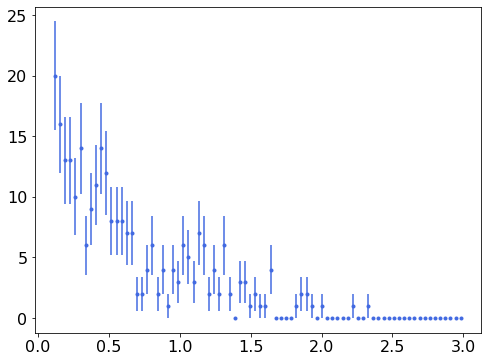

In [4]:
pltdist(data, bins=80, bounds=bounds)

In [5]:
obs = zfit.Space('x', limits=bounds)

In [6]:
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 20., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [7]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=1.2, sigma=0.1)
background =  Nbkg * zfit.pdf.Exponential(obs=obs, lambda_=lambda_)
tot_model = signal + background

In [8]:
# Create the negative log likelihood
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=[tot_model], data=[data_]) 

In [9]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [10]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


FCN = -1145.206731390898 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 2.073263880560436e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nbkg,251.519,16.7508,,,0,298.1,No
1,Nsig,19.4765,7.12433,,,-20,271,No
2,lambda,-1.93315,0.140796,,,-4,-1,No


Text(0, 0.5, 'number of events')

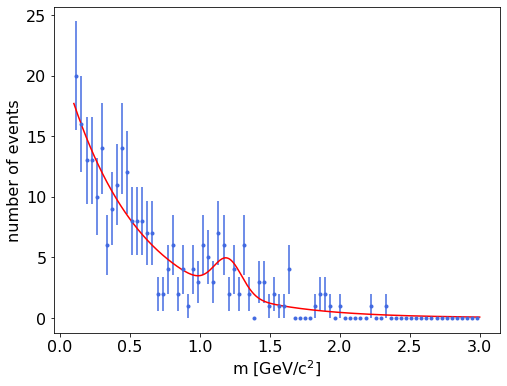

In [11]:
nbins = 80
pltdist(data, nbins, bounds)
plotfitresult(tot_model, bounds, nbins, data)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Discovery test

In a discovery test the null hypothesis is the absence of signal, .i.e Nsig = 0.

In [12]:
# instantation of the calculator
calculator = FrequentistCalculator(nll, minimizer, ntoysnull=5000)
calculator.bestfit = minimum #optionnal
calculator.load_toys_from_yaml("discovery_freq_zfit_toys.yaml")

In [13]:
# parameter of interest of the null hypothesis
poinull = POI(Nsig, 0)

In [14]:
# instantation of the discovery test
discovery_test = Discovery(calculator, poinull)

In [15]:
pnull, significance = discovery_test.result()


p_value for the Null hypothesis = 0.0006
Significance (in units of sigma) = 3.2388801183529563


Text(0.5, 0, 'q')

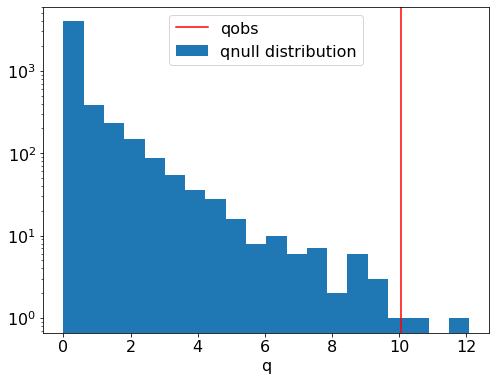

In [16]:
plt.hist(calculator.qnull(poinull, None, onesided=True, onesideddiscovery=True)[poinull], bins=20, label="qnull distribution", log=True)
plt.axvline(calculator.qobs(poinull, onesided=True, onesideddiscovery=True), color="red", label="qobs")
plt.legend(loc="best")
plt.xlabel("q")

In [17]:
#calculator.save_toys_to_yaml("discovery_freq_zfit_toys.yaml")

In [18]:
significance

3.2388801183529563

In [19]:
pnull

0.0006